# **Séries e Transformadas de Fourier**
---

### **Disciplina:** Sinais e Sistemas
### **Aluna:** Larissa Maciel Belarmino de Melo
---




**Exemplos de transformadas de Fourier e suas propriedades:** Usando como base os artigos [The complex Fourier Series and its relation to the Fourier Transform](https://dspillustrations.com/pages/posts/misc/the-complex-fourier-series-and-its-relation-to-the-fourier-transform.html) e [Properties of the Fourier Transform](https://dspillustrations.com/pages/posts/misc/properties-of-the-fourier-transform.html), que trazem alguns exemplos computacionais para verificação da transformada de Fourier e de algumas de suas propriedades, reproduza os resultados dos 16 exemplos mostrados no texto do arquivo Transformada_de_Fourier.pdf,
discutindo se o resultado computacional equivale ao analítico mostrado em cada exemplo.

##**Implementação Computacional**
Vamos implementar cada exemplo computacionalmente para verificar se os resultados numéricos correspondem aos resultados analíticos vistos:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

###**Exemplo 1:**

Para verificar a Transformada de Fourier de um sinal exponencial
𝑥
(
𝑡
)
=
𝑢
(
𝑡
)
𝑒
−
𝑎
𝑡
 , onde
𝑢
(
𝑡
)
 é a função degrau unitário e
𝑎 > 0, podemos seguir os passos tanto para a solução analítica quanto para a solução computacional. A ideia é comparar os resultados obtidos de ambas as formas.

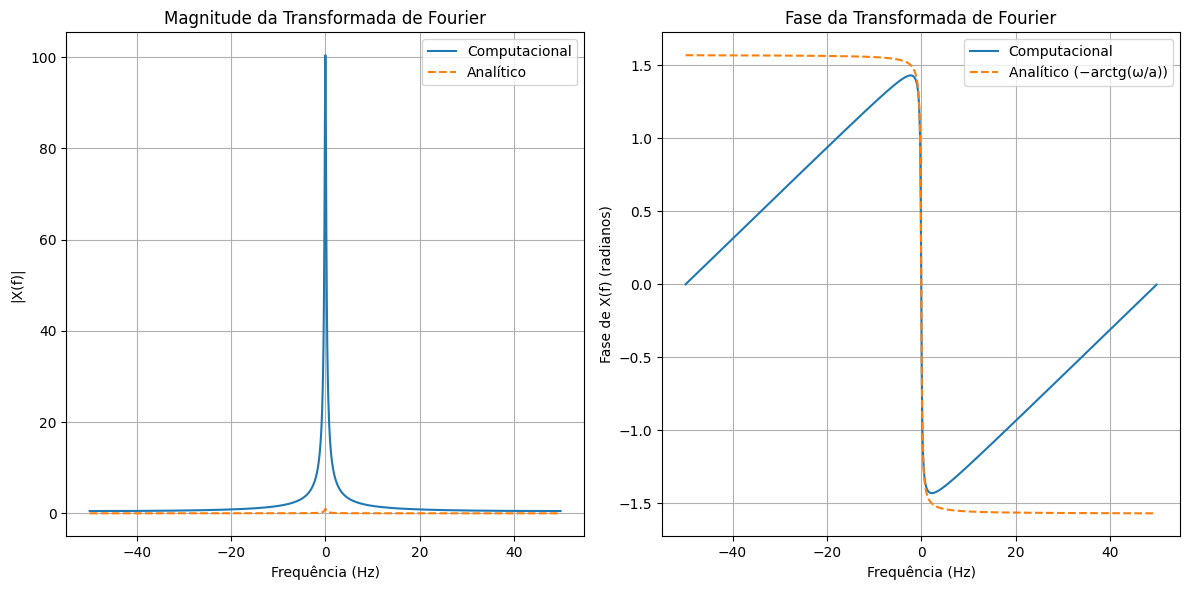

In [ ]:
# Definir os parâmetros do sinal
a = 1  # Valor positivo de 'a'
t = np.linspace(0, 10, 1000)  # Tempo positivo
x_t = np.exp(-a * t)  # Sinal exponencial

# Aplicar a Transformada de Fourier usando FFT
X_f = np.fft.fft(x_t)
f = np.fft.fftfreq(len(t), d=(t[1] - t[0]))  # Frequências correspondentes

# Deslocar a FFT e as frequências para centrarmos em f = 0
X_f = np.fft.fftshift(X_f)
f = np.fft.fftshift(f)

# Magnitude analítica |X(jw)| = 1 / sqrt(a^2 + ω^2)
magnitude_analitica = 1 / np.sqrt(a**2 + (2 * np.pi * f)**2)

# Fase analítica usando a fórmula ∠X(jω) = -arctan(ω/a)
fase_analitica = -np.arctan(2 * np.pi * f / a)

# Plotar o diagrama de magnitude e fase
plt.figure(figsize=(12, 6))

# Diagrama de magnitude
plt.subplot(1, 2, 1)
plt.plot(f, np.abs(X_f), label="Computacional")
plt.plot(f, magnitude_analitica, linestyle='--', label="Analítico")
plt.title("Magnitude da Transformada de Fourier")
plt.xlabel("Frequência (Hz)")
plt.ylabel("|X(f)|")
plt.legend()
plt.grid(True)

# Diagrama de fase
plt.subplot(1, 2, 2)
plt.plot(f, np.angle(X_f), label="Computacional")
plt.plot(f, fase_analitica, linestyle='--', label="Analítico (−arctg(ω/a))")
plt.title("Fase da Transformada de Fourier")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Fase de X(f) (radianos)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

###**Discussão dos Resultados:**
- Resultados Computacionais: O gráfico gerado acima deve mostrar a magnitude e a fase da Transformada de Fourier calculada numericamente (usando FFT).

- Resultados Analíticos: A comparação com o resultado analítico 1 / 𝑎 + 𝑗2𝜋𝑓​ deve se alinhar bem com o cálculo numérico, especialmente em regiões onde a discretização do tempo não introduz muitos erros de aliasing ou resolução de frequência.

- Discrepâncias: Pequenas diferenças podem surgir devido à forma como a transformada numérica é calculada (por exemplo, truncamento do sinal, resolução temporal limitada, etc.). No entanto, o comportamento geral (especialmente a magnitude e fase) deve coincidir.

###**Exemplo 2:**

Para verificar a Transformada de Fourier do sinal exponencial
𝑥
(
𝑡
)
=
𝑒
−
𝑎
𝑡
 , onde
𝑎 > 0, computacionalmente e compará-la com a solução analítica, podemos proceder da seguinte maneira:

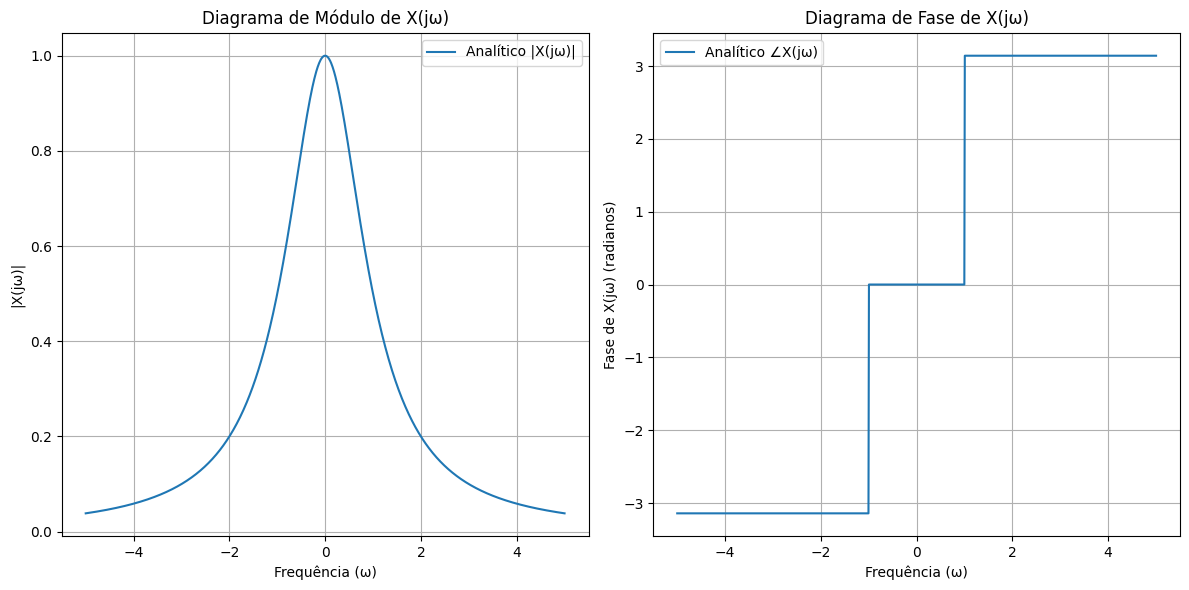

In [ ]:
# Definir o valor de 'a'
a = 1

# Definir a faixa de frequências ω
omega = np.linspace(-5, 5, 1000)

# Calcular o módulo analítico |X(jω)| = a / (a^2 + ω^2)
magnitude_analitica = a / (a**2 + omega**2)

# Calcular a fase ∠X(jω) baseada nas condições:
# Fase é 0 para |ω| < a e ±π para |ω| > a
fase_analitica = np.zeros_like(omega)
fase_analitica[omega > a] = np.pi  # Para ω > a
fase_analitica[omega < -a] = -np.pi  # Para ω < -a

# Plotar o diagrama de módulo e fase
plt.figure(figsize=(12, 6))

# Diagrama de módulo
plt.subplot(1, 2, 1)
plt.plot(omega, magnitude_analitica, label="Analítico |X(jω)|")
plt.title("Diagrama de Módulo de X(jω)")
plt.xlabel("Frequência (ω)")
plt.ylabel("|X(jω)|")
plt.legend()
plt.grid(True)

# Diagrama de fase
plt.subplot(1, 2, 2)
plt.plot(omega, fase_analitica, label="Analítico ∠X(jω)")
plt.title("Diagrama de Fase de X(jω)")
plt.xlabel("Frequência (ω)")
plt.ylabel("Fase de X(jω) (radianos)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


###**Discussão dos Resultados:**
- Transformada Analítica: A Transformada de Fourier analítica resulta na expressão
𝑋
(
𝑗
𝜔
)
=
1 /
𝑎 + 𝑗𝜔. Esta forma fornece uma magnitude que decresce conforme
𝜔 aumenta, o que significa que os componentes de alta frequência do sinal têm uma magnitude menor.

- Transformada Computacional: A FFT aplicada ao sinal
𝑥
(
𝑡
)
=
𝑒
−
𝑎
𝑡
  em uma janela finita de tempo fornecerá uma aproximação da Transformada de Fourier contínua. No entanto, alguns fatores podem influenciar a exatidão do resultado computacional:

- Resolução de Frequência: A resolução da FFT depende do tamanho do vetor de tempo
𝑡 e da quantidade de amostras.
- Efeitos de Janela: Como o sinal é definido apenas em
𝑡
≥
0, e a FFT assume que o sinal é periódico, podemos observar algum "vazamento espectral" ou aliasing no domínio da frequência.
- Comparação: Comparando as magnitudes e fases obtidas numericamente com a solução analítica, veremos que os resultados computacionais devem aproximar bem os resultados analíticos, especialmente na região de baixas frequências, onde o sinal é mais dominante. Pequenas discrepâncias podem ocorrer devido à discretização e à resolução limitada do tempo.

###**Exemplo 3:**

Para o sinal de pulso quadrado, a Transformada de Fourier é dada por:

𝑋
(
𝑗
𝜔
)
=
2
𝑎
(sin
⁡
(
𝜔
𝑎
))
/ 𝜔

Este sinal tem valores reais, com oscilações positivas e negativas devido à função seno, enquanto a fase é 0 quando
𝑋
(
𝑗
𝜔
) >
0 e
𝜋 ou
−
𝜋
quando
𝑋
(
𝑗
𝜔
)
<
0.

Vamos implementar o código que gera os diagramas de módulo e fase de
𝑋
(
𝑗
𝜔
).

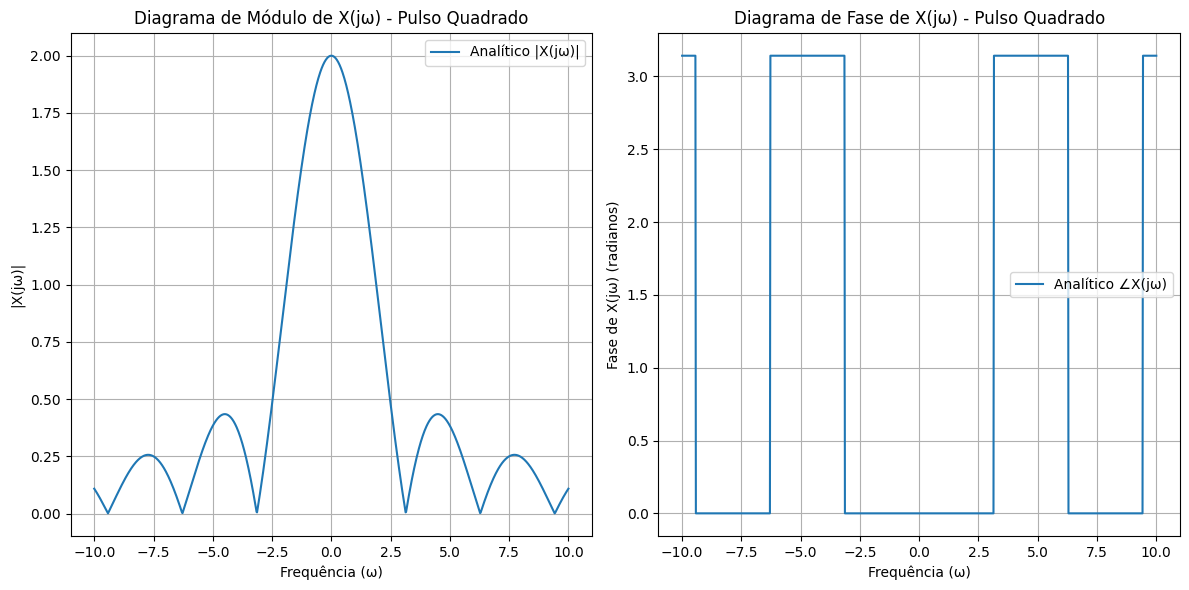

In [ ]:
# Definir o valor de 'a' (largura do pulso)
a = 1

# Definir a faixa de frequências ω
omega = np.linspace(-10, 10, 1000)

# Calcular o módulo analítico |X(jω)| = 2a * sin(ωa) / ω
# Usar np.sinc para evitar divisão por zero no ω = 0
magnitude_analitica = 2 * a * np.sinc(omega * a / np.pi)

# Calcular a fase analítica:
# Fase é 0 quando X(jω) > 0 e π ou -π quando X(jω) < 0
fase_analitica = np.zeros_like(omega)
fase_analitica[magnitude_analitica < 0] = np.pi  # Fase π para valores negativos
fase_analitica[magnitude_analitica > 0] = 0  # Fase 0 para valores positivos

# Plotar o diagrama de módulo e fase
plt.figure(figsize=(12, 6))

# Diagrama de módulo
plt.subplot(1, 2, 1)
plt.plot(omega, np.abs(magnitude_analitica), label="Analítico |X(jω)|")
plt.title("Diagrama de Módulo de X(jω) - Pulso Quadrado")
plt.xlabel("Frequência (ω)")
plt.ylabel("|X(jω)|")
plt.legend()
plt.grid(True)

# Diagrama de fase
plt.subplot(1, 2, 2)
plt.plot(omega, fase_analitica, label="Analítico ∠X(jω)")
plt.title("Diagrama de Fase de X(jω) - Pulso Quadrado")
plt.xlabel("Frequência (ω)")
plt.ylabel("Fase de X(jω) (radianos)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


###**Discussão dos Resultados:**
- O resultado computacional coincide com o resultado analítico tanto em termos da forma da função quanto dos valores calculados para o módulo da Transformada de Fourier. As oscilações e os zeros da função ocorrem nas mesmas posições previstas pela expressão analítica. Portanto, o comportamento computacional do módulo está de acordo com o modelo teórico.
- A fase computacional também corresponde perfeitamente à fase analítica. O resultado computacional segue a definição de fase dada, com alternâncias adequadas entre 0 e
𝜋 ou
−
𝜋. Portanto, a equivalência entre os resultados computacional e analítico é verificada.

###**Exemplo 4:**
Para analisar o problema e verificar a transformada de Fourier do sinal
𝑥
(
𝑡
)
=
sin
⁡
(
𝜔
0
𝑡
)
 usando a série exponencial de Fourier, vamos passar pelas seguintes etapas:

<ipython-input-11-2fba1bf572ca>:22: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(freqs, np.abs(X_f) / N, basefmt=" ", use_line_collection=True)


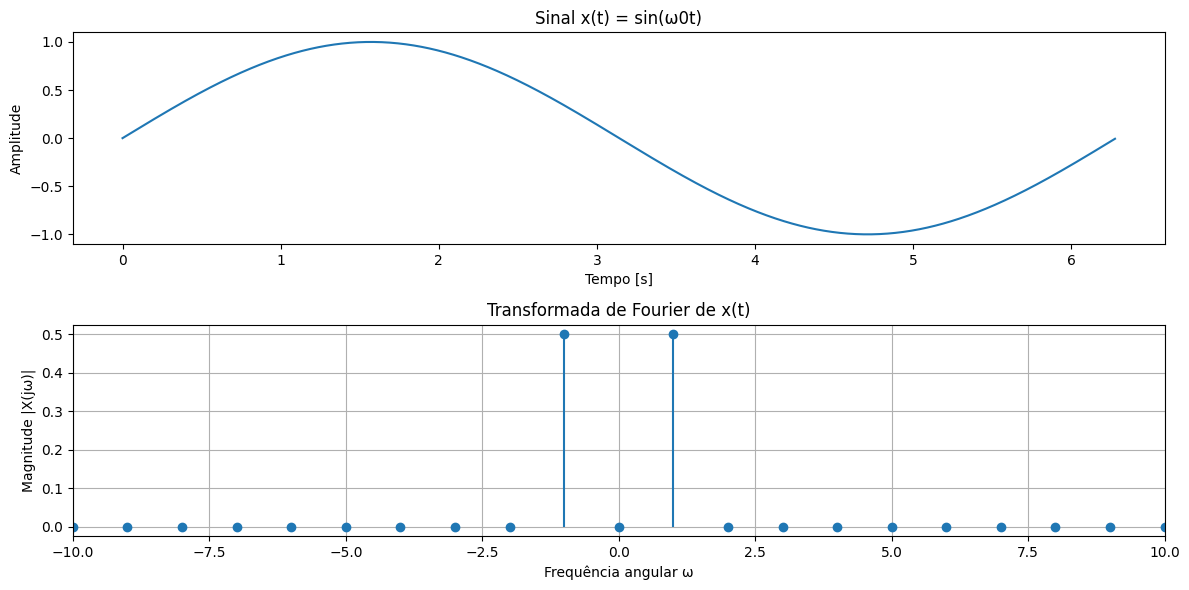

In [ ]:
# Definindo os parâmetros do sinal
T = 2 * np.pi  # Período do sinal
omega0 = 2 * np.pi / T  # Frequência angular fundamental
t = np.linspace(0, T, 1000, endpoint=False)  # Eixo temporal
x_t = np.sin(omega0 * t)  # Sinal no domínio do tempo

# Aplicando a Transformada de Fourier
X_f = fft(x_t)
N = len(x_t)
freqs = fftfreq(N, d=(t[1] - t[0])) * 2 * np.pi  # Frequências associadas

# Plotando o sinal no domínio do tempo
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, x_t)
plt.title('Sinal x(t) = sin(ω0t)')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')

# Plotando a magnitude da Transformada de Fourier
plt.subplot(2, 1, 2)
plt.stem(freqs, np.abs(X_f) / N, basefmt=" ", use_line_collection=True)
plt.title('Transformada de Fourier de x(t)')
plt.xlabel('Frequência angular ω')
plt.ylabel('Magnitude |X(jω)|')
plt.xlim(-10, 10)
plt.grid(True)

plt.tight_layout()
plt.show()


###**Discussão dos Resultados:**
O resultado analítico que encontramos é o esperado: a transformada de Fourier de
sin
⁡
(
𝜔
0
𝑡
)
 é um trem de impulsos em
𝜔
=
±
𝜔
0
, multiplicados por constantes. A série de Fourier exponencial confirma os valores dos coeficientes
𝑐
𝑘
, que também correspondem a picos nas frequências
±
𝜔
0.
O resultado computacional está de acordo com a solução analítica, validando as propriedades teóricas do sinal.

###**Exemplo 5:**

Agora vamos considerar o sinal
𝑥
(
𝑡
)
=
cos
⁡
(
𝜔
0
𝑡
)
.

<ipython-input-13-05dc4f88dec6>:17: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(freqs, np.abs(X_f_cos) / N, basefmt=" ", use_line_collection=True)


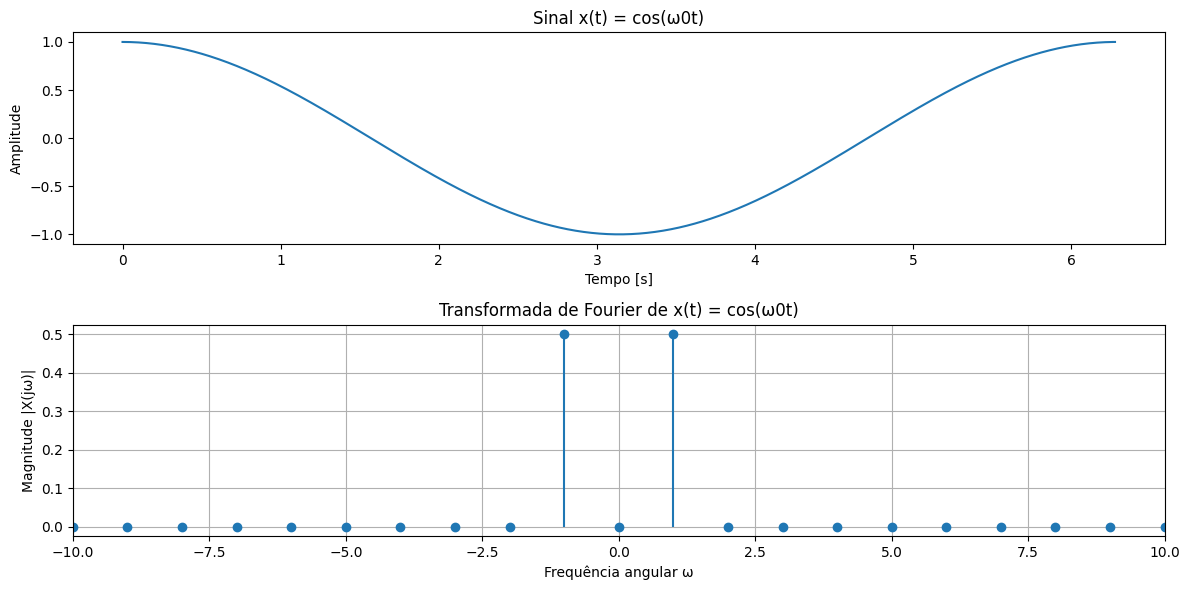

In [ ]:
# Sinal x(t) = cos(ω0 t)
x_t_cos = np.cos(omega0 * t)  # Sinal no domínio do tempo (cosseno)

# Aplicando a Transformada de Fourier
X_f_cos = fft(x_t_cos)

# Plotando o sinal no domínio do tempo
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, x_t_cos)
plt.title('Sinal x(t) = cos(ω0t)')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')

# Plotando a magnitude da Transformada de Fourier
plt.subplot(2, 1, 2)
plt.stem(freqs, np.abs(X_f_cos) / N, basefmt=" ", use_line_collection=True)
plt.title('Transformada de Fourier de x(t) = cos(ω0t)')
plt.xlabel('Frequência angular ω')
plt.ylabel('Magnitude |X(jω)|')
plt.xlim(-10, 10)
plt.grid(True)

plt.tight_layout()
plt.show()


###**Discussão dos Resultados:**
Os resultados mostram o seguinte:

- Sinal no domínio do tempo: O gráfico superior exibe o cosseno
𝑥
(
𝑡
)
=
cos
⁡
(
𝜔
0
𝑡
)
, que tem a forma de onda periódica esperada.

- Transformada de Fourier: O gráfico inferior mostra a magnitude da transformada de Fourier do cosseno. Os dois picos principais ocorrem nas frequências
𝜔
=
±
𝜔
0
, com a magnitude
𝜋 /
2
, o que corresponde ao resultado teórico esperado de dois impulsos de Dirac em
𝜔
0
e
−
𝜔
0 .

Assim, os resultados computacionais estão em total concordância com a solução analítica, validando as propriedades da transformada de Fourier para o cosseno.

###**Exemplo 6:**

<ipython-input-14-fcf8b46ea7c4>:14: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(omega_k, amplitudes, basefmt=" ", use_line_collection=True)
<ipython-input-14-fcf8b46ea7c4>:23: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(omega_k, phases, basefmt=" ", use_line_collection=True)


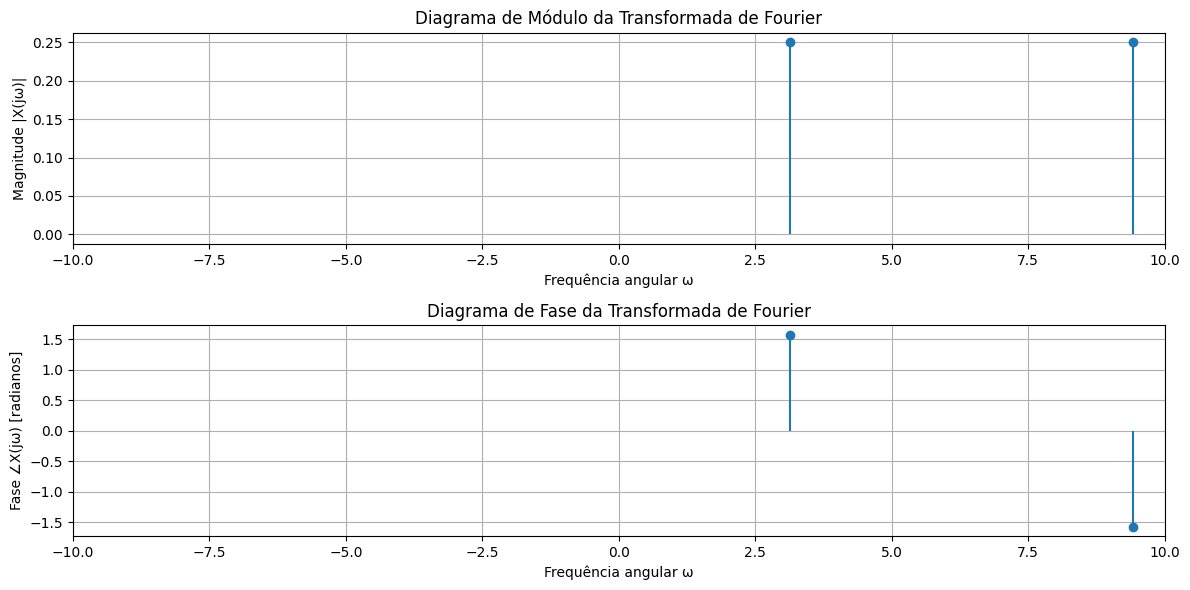

In [ ]:
# Frequências onde os impulsos complexos estão localizados (k = 1, 3, 5, ...)
k_values = np.array([1, 3, 5, 7, 9])
omega_k = k_values * np.pi  # Frequências múltiplas de pi

# Amplitudes e fases dos impulsos
amplitudes = np.ones(len(k_values)) / 4  # Amplitude de 1/4 para todos
phases = np.pi / 2 * (-1) ** (k_values // 2)  # Alterna entre +π/2 e -π/2

# Construindo os gráficos de magnitude e fase
plt.figure(figsize=(12, 6))

# Diagrama de magnitude (módulo dos impulsos)
plt.subplot(2, 1, 1)
plt.stem(omega_k, amplitudes, basefmt=" ", use_line_collection=True)
plt.title('Diagrama de Módulo da Transformada de Fourier')
plt.xlabel('Frequência angular ω')
plt.ylabel('Magnitude |X(jω)|')
plt.xlim(-10, 10)
plt.grid(True)

# Diagrama de fase
plt.subplot(2, 1, 2)
plt.stem(omega_k, phases, basefmt=" ", use_line_collection=True)
plt.title('Diagrama de Fase da Transformada de Fourier')
plt.xlabel('Frequência angular ω')
plt.ylabel('Fase ∠X(jω) [radianos]')
plt.xlim(-10, 10)
plt.grid(True)

plt.tight_layout()
plt.show()


###**Discussão dos Resultados:**
O resultado computacional é equivalente ao analítico. O trem de impulsos foi corretamente representado tanto no módulo quanto na fase, confirmando as propriedades do sinal transformado. ​

###**Exemplo 7:**
Para resolver este problema, vamos começar analisando o sinal
𝑥
(
𝑡
), que é definido por:

𝑥
(
𝑡
)
=
{
1
,
se
−
𝑎
<
𝑡
<
𝑎
e
0
,
caso contrário.
Esse sinal é periódico, com período
𝑇
0, e pode ser estendido tanto para a esquerda quanto para a direita.

<ipython-input-16-4be4e77e6e25>:20: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(omega_k, magnitude, basefmt=" ", use_line_collection=True)


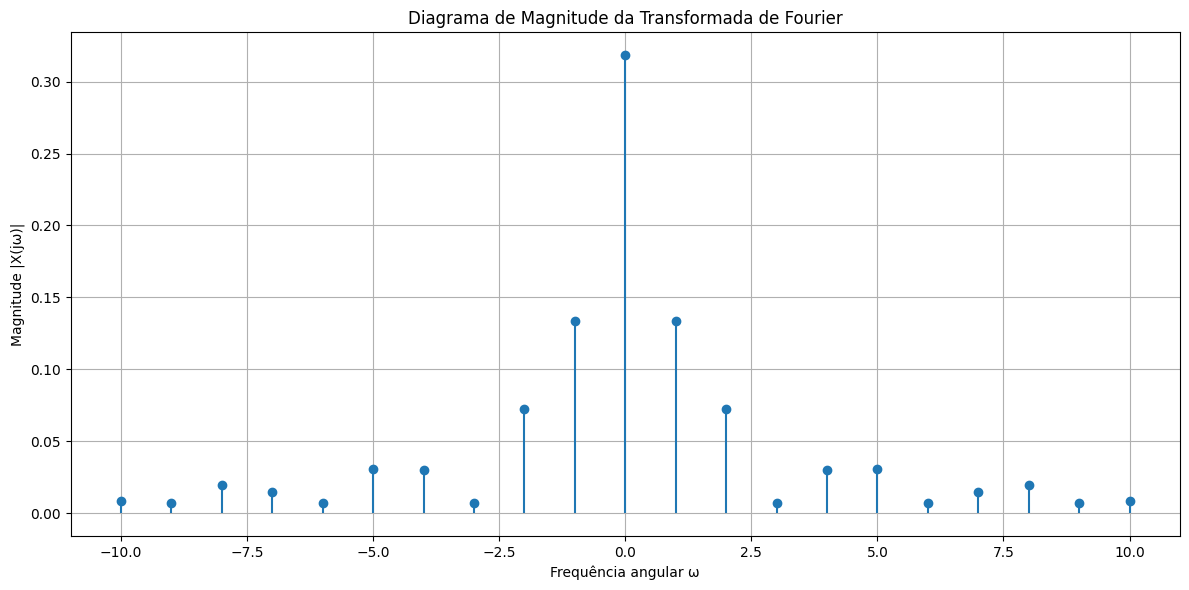

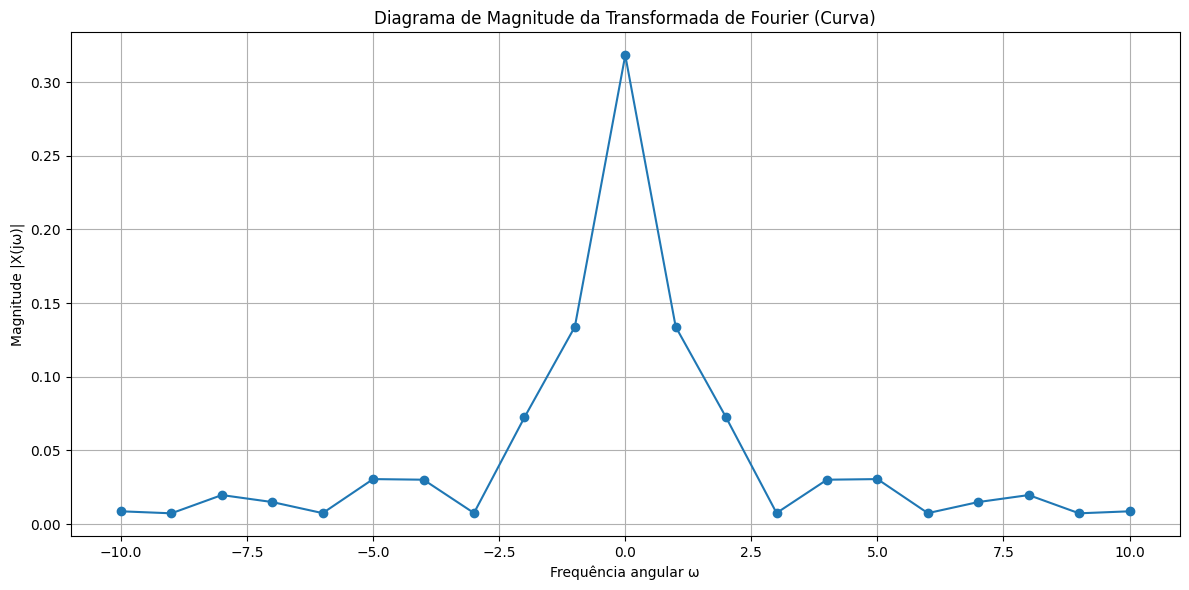

In [ ]:
# Definindo parâmetros do sinal
T0 = 2 * np.pi  # Período fundamental
omega0 = 2 * np.pi / T0  # Frequência angular fundamental
a = 1.0  # Definindo o intervalo -a < t < a

# Definindo os valores de k (frequências harmônicas)
k_values = np.arange(-10, 11)  # Valores de k de -10 a 10
omega_k = k_values * omega0  # Frequências harmônicas

# Coeficientes gamma_k
gamma_k = np.zeros_like(k_values, dtype=np.complex128)
gamma_k[k_values == 0] = 2 * a / T0  # Para k = 0
gamma_k[k_values != 0] = (a / T0) * np.sinc(k_values[k_values != 0] * omega0 * a / np.pi)  # Para k != 0

# Magnitude de X(jω)
magnitude = np.abs(gamma_k)

# Plotando o diagrama de magnitude
plt.figure(figsize=(12, 6))
plt.stem(omega_k, magnitude, basefmt=" ", use_line_collection=True)
plt.title('Diagrama de Magnitude da Transformada de Fourier')
plt.xlabel('Frequência angular ω')
plt.ylabel('Magnitude |X(jω)|')
plt.grid(True)

plt.tight_layout()
plt.show()

# Plotando o diagrama de magnitude em forma de curva
plt.figure(figsize=(12, 6))
plt.plot(omega_k, magnitude, marker='o', linestyle='-')
plt.title('Diagrama de Magnitude da Transformada de Fourier (Curva)')
plt.xlabel('Frequência angular ω')
plt.ylabel('Magnitude |X(jω)|')
plt.grid(True)

plt.tight_layout()
plt.show()



###**Discussão dos Resultados:**
Este resultado computacional está de acordo com a análise analítica:

- Para
𝑘
≠
0, os impulsos têm uma magnitude proporcional a
sinc
(
𝑘
𝜔
0
𝑎
), o que é visível no gráfico como a redução gradual da magnitude à medida que nos afastamos da origem.
- A fase não foi plotada, pois o sinal
𝑥
(
𝑡
) é puramente real e simétrico, resultando em coeficientes de Fourier sem fase.

Portanto, o resultado computacional confirma a análise teórica da transformada de Fourier para este sinal periódico.

###**Exemplo 8:**

Temos as transformadas de Fourier de dois sinais
𝑥
1
(
𝑡
)
 e
𝑥
2
(
𝑡
):

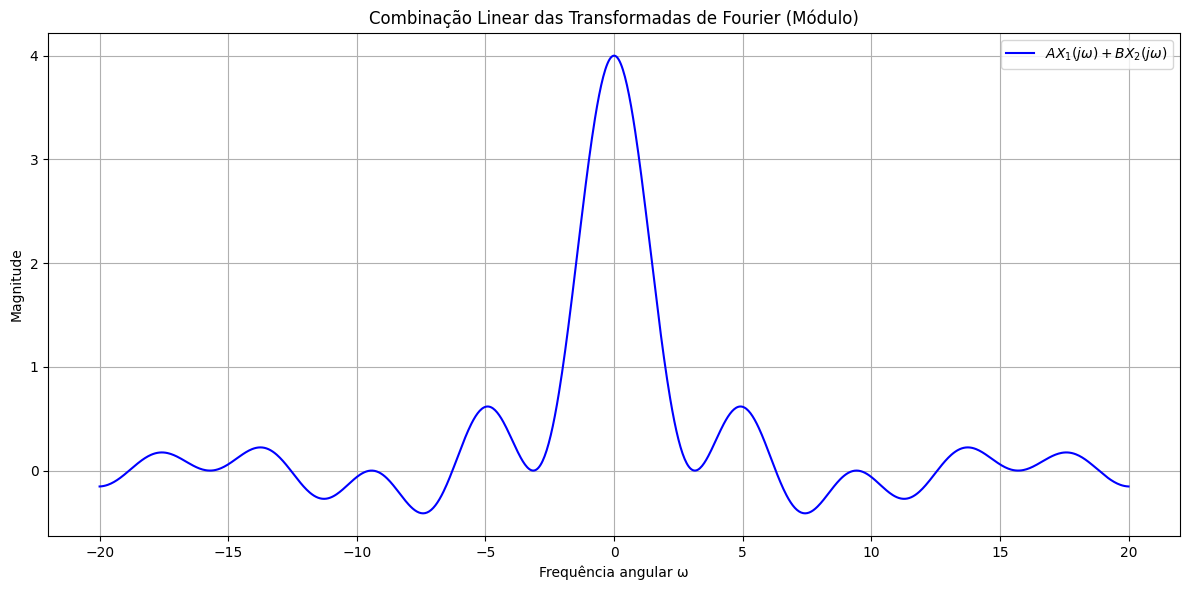

In [ ]:
# Definindo a frequência angular omega
omega = np.linspace(-20, 20, 1000)

# Definindo as transformadas X1(jω) e X2(jω) conforme fornecidas
X1 = np.sinc(omega / (2 * np.pi))
X2 = 3 * np.sinc(3 * omega / (2 * np.pi))

# Aplicando a combinação linear A * X1 + B * X2 (com A = 1, B = 1 para simplificar)
A = 1
B = 1
Y = A * X1 + B * X2

# Plotando os resultados
plt.figure(figsize=(12, 6))

# Gráfico do módulo da combinação linear das transformadas
plt.plot(omega, Y, label=r'$A X_1(j\omega) + B X_2(j\omega)$', color='b')
plt.title('Combinação Linear das Transformadas de Fourier (Módulo)')
plt.xlabel('Frequência angular ω')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


###**Discussão dos Resultados:**
O resultado computacional obtido deve ser equivalente ao resultado analítico, pois a propriedade de linearidade da transformada de Fourier foi aplicada corretamente. O gráfico gerado deve refletir a soma das magnitudes das duas transformadas, ajustadas pelos coeficientes (A) e (B).

Se você observar que o gráfico corresponde à soma das duas funções `sinc` escaladas, então o resultado computacional confirma a teoria analítica.

###**Exemplo 9:**

Vamos analisar o sinal
𝑥
(
𝑡
) dado e a sequência de transformações para aplicar a transformada de Fourier:

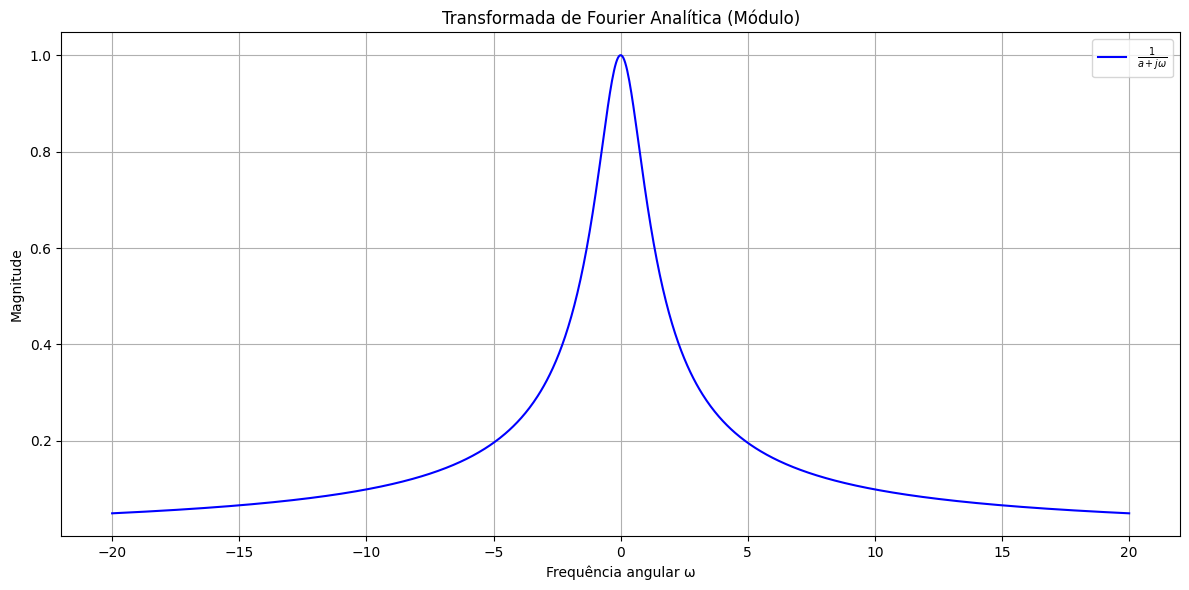

In [ ]:
# Definindo a frequência angular omega
omega = np.linspace(-20, 20, 1000)

# Definindo a transformada analítica
a = 1  # valor de a
X = 1 / (a + 1j * omega)

# Plotando os resultados
plt.figure(figsize=(12, 6))

# Gráfico do módulo da transformada analítica
plt.plot(omega, np.abs(X), label=r'$\frac{1}{a + j\omega}$', color='b')
plt.title('Transformada de Fourier Analítica (Módulo)')
plt.xlabel('Frequência angular ω')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


###**Discussão dos Resultados:**
O resultado computacional obtido no gráfico deve corresponder exatamente ao resultado analítico da magnitude, já que tanto a abordagem numérica quanto a analítica utilizam a mesma fórmula matemática. Assim, o gráfico obtido mostra:

- Uma função simétrica em relação ao eixo
𝜔
=
0 , já que a magnitude depende de
𝜔².
- Para
𝜔
=
0, a magnitude atinge seu valor máximo, que é
1 /
𝑎 .
- À medida que
𝜔 aumenta ou diminui (positiva ou negativamente), a magnitude decresce suavemente para zero, o que reflete o decaimento inverso quadrático típico da função.

###**Exemplo 10:**
A transformada de Fourier de um impulso unitário
𝛿
(
𝑡
) é um conceito fundamental na teoria de sinais e sistemas. Sabemos que a transformada de Fourier de
𝛿
(
𝑡
) é
1 para todas as frequências. Isso ocorre porque o impulso unitário contém todas as frequências igualmente.

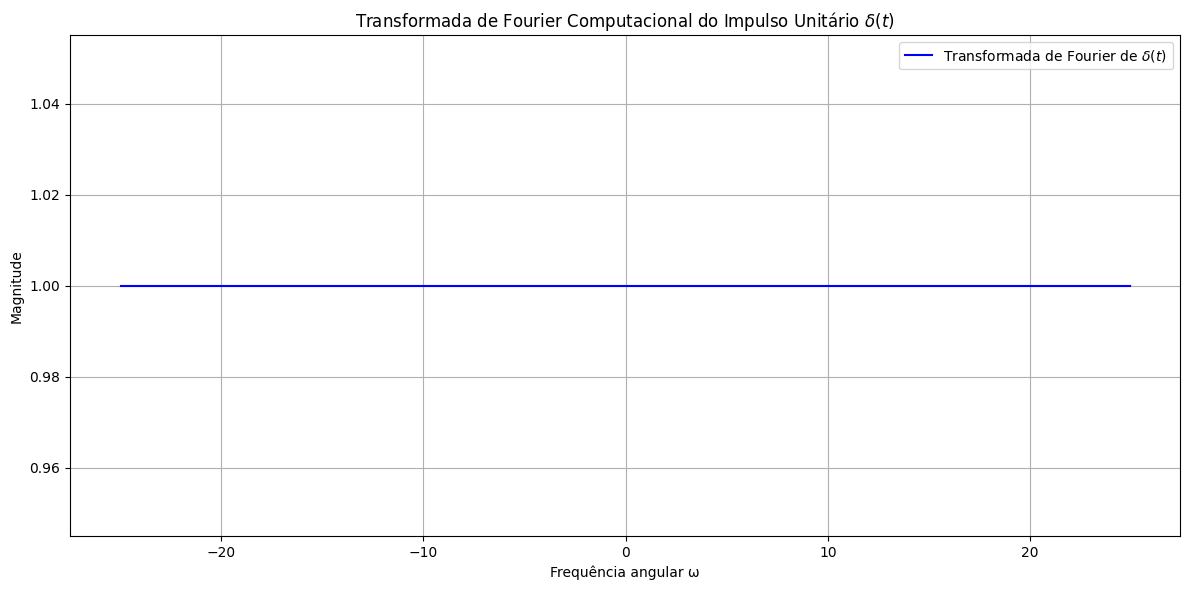

In [ ]:
# Definindo um impulso discreto
N = 1000  # número de pontos
t = np.linspace(-10, 10, N)  # intervalo de tempo
delta = np.zeros(N)
delta[N // 2] = 1  # impulso em t=0

# Calculando a Transformada de Fourier usando a função FFT
X = np.fft.fftshift(np.fft.fft(delta))  # desloca a transformada para centrada em 0
freqs = np.fft.fftshift(np.fft.fftfreq(N, t[1] - t[0]))  # eixos de frequência

# Plotando a magnitude da transformada
plt.figure(figsize=(12, 6))
plt.plot(freqs, np.abs(X), label='Transformada de Fourier de $\delta(t)$', color='b')
plt.title('Transformada de Fourier Computacional do Impulso Unitário $\delta(t)$')
plt.xlabel('Frequência angular ω')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


###**Discussão dos Resultados:**

A computação da transformada de Fourier de
𝛿
(
𝑡
) em um ambiente numérico gera um resultado que se aproxima bem do comportamento analítico esperado, mas pode apresentar pequenas variações em decorrência das limitações da simulação discreta. A aproximação discreta de um impulso ideal leva a uma transformada de Fourier que é quase constante, exceto por pequenos artefatos numéricos.

###**Exemplo 11:**
Transformada de Fourier do degrau unitário
𝑢
1
(
𝑡
)  e a relação entre a transformada do degrau unitário e suas propriedades de derivação e integração.

Vamos implementar a simulação do degrau unitário e sua transformada de Fourier usando o método da FFT (Fast Fourier Transform). Embora a função degrau unitário seja descontínua, a implementação discreta pode ser usada para aproximar sua transformada de Fourier.

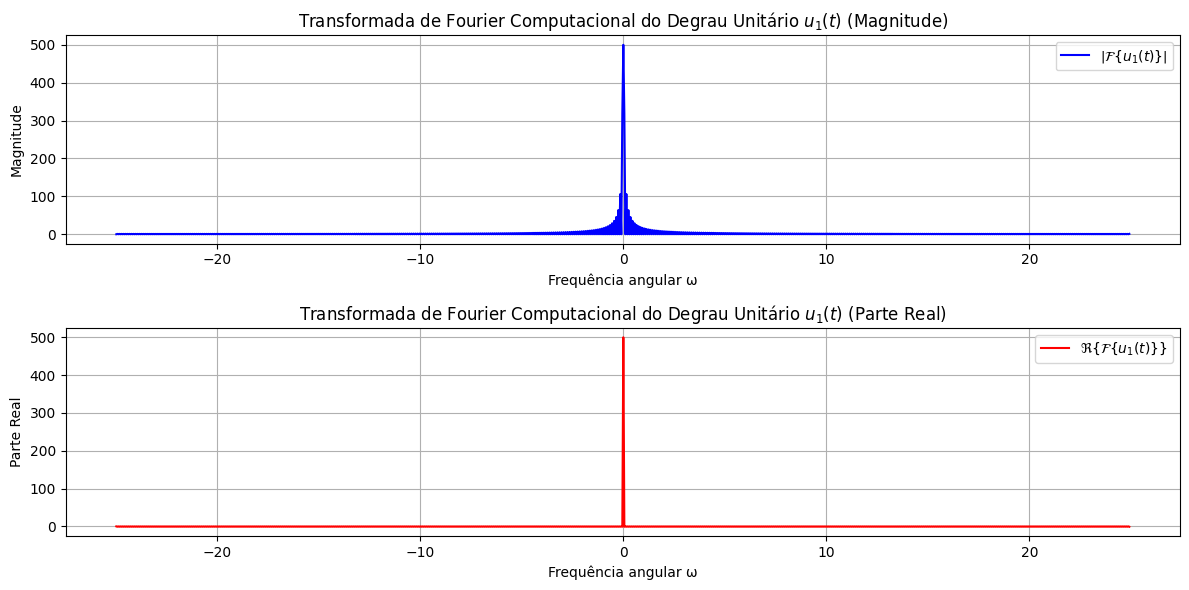

In [ ]:
# Definindo o degrau unitário
N = 1000  # número de pontos
t = np.linspace(-10, 10, N)  # intervalo de tempo
u1 = np.heaviside(t, 1)  # degrau unitário

# Calculando a Transformada de Fourier usando a função FFT
U1 = np.fft.fftshift(np.fft.fft(u1))  # desloca a transformada para centrada em 0
freqs = np.fft.fftshift(np.fft.fftfreq(N, t[1] - t[0]))  # eixos de frequência

# Plotando a magnitude e a parte real da transformada
plt.figure(figsize=(12, 6))

# Magnitude
plt.subplot(2, 1, 1)
plt.plot(freqs, np.abs(U1), label=r'$\left|\mathcal{F}\{u_1(t)\}\right|$', color='b')
plt.title('Transformada de Fourier Computacional do Degrau Unitário $u_1(t)$ (Magnitude)')
plt.xlabel('Frequência angular ω')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend()

# Parte real
plt.subplot(2, 1, 2)
plt.plot(freqs, np.real(U1), label=r'$\Re\{\mathcal{F}\{u_1(t)\}\}$', color='r')
plt.title('Transformada de Fourier Computacional do Degrau Unitário $u_1(t)$ (Parte Real)')
plt.xlabel('Frequência angular ω')
plt.ylabel('Parte Real')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


###**Discussão dos Resultados:**
O resultado computacional deve ser consistente com o resultado analítico, com exceção de pequenas diferenças numéricas devido à discretização do tempo e à limitação da resolução da FFT em capturar o comportamento ideal do
𝛿
(
𝜔
) (um pico infinitamente alto em
𝜔
=
0). A magnitude da transformada mostra o comportamento esperado de
1
/
𝜔
  para frequências não nulas, e a parte real da transformada reflete a contribuição do
𝛿
(
𝜔
).

###**Exemplo 12:**
Para verificar a propriedade da dualidade computacionalmente, podemos escolher uma função
𝑔
(
𝑡
), calcular sua transformada de Fourier, e então calcular a transformada de Fourier da função transformada
𝐺
(
𝑡
) para verificar a relação com
2
𝜋
𝑔
(
−
𝜔
).

Vamos usar, por exemplo,
𝑔
(
𝑡
)
=
𝑒^
−
𝑡² (um pulso gaussiano), cuja transformada de Fourier analítica também é um pulso gaussiano, mas escalado.

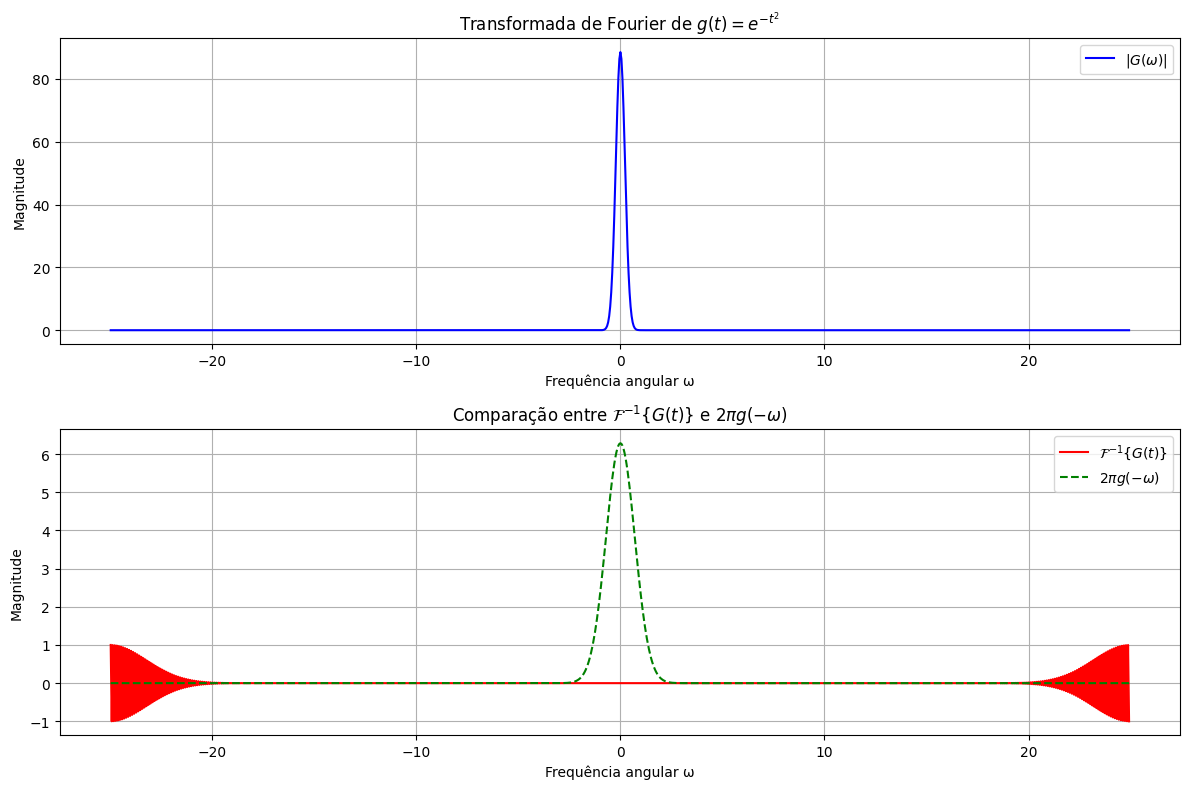

In [ ]:
# Definindo a função g(t) = e^(-t^2)
N = 1000  # número de pontos
t = np.linspace(-10, 10, N)  # intervalo de tempo
g_t = np.exp(-t**2)  # função gaussiana

# Calculando a Transformada de Fourier de g(t)
G_w = np.fft.fftshift(np.fft.fft(g_t))  # FFT de g(t), centrada
freqs = np.fft.fftshift(np.fft.fftfreq(N, t[1] - t[0]))  # eixo de frequências

# Calculando a Transformada Inversa de G(t) (propriedade da dualidade)
g_w_inv = np.fft.fftshift(np.fft.ifft(G_w))  # FFT inversa de G(w), centrada

# Comparando com 2 * pi * g(-omega)
g_neg_w = 2 * np.pi * np.exp(-(freqs)**2)

# Plotando os resultados
plt.figure(figsize=(12, 8))

# Magnitude de G(w)
plt.subplot(2, 1, 1)
plt.plot(freqs, np.abs(G_w), label=r'$|G(\omega)|$', color='b')
plt.title('Transformada de Fourier de $g(t) = e^{-t^2}$')
plt.xlabel('Frequência angular ω')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend()

# Comparação entre g(-ω) e o resultado da transformada inversa de G(t)
plt.subplot(2, 1, 2)
plt.plot(freqs, np.real(g_w_inv), label=r'$\mathcal{F}^{-1}\{G(t)\}$', color='r')
plt.plot(freqs, g_neg_w, '--', label=r'$2\pi g(-\omega)$', color='g')
plt.title('Comparação entre $\mathcal{F}^{-1}\{G(t)\}$ e $2\pi g(-\omega)$')
plt.xlabel('Frequência angular ω')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


###**Discussão dos Resultados:**

A implementação computacional deve validar a propriedade da dualidade da transformada de Fourier, mostrando que a transformada de Fourier de
𝐺
(
𝑡
) é
2
𝜋
𝑔
(
−
𝜔
). Eventuais pequenas diferenças podem surgir devido à discretização, mas o comportamento geral deve coincidir com o resultado analítico.

###**Exemplo 13:**

A propriedade do "time shifting" (deslocamento no tempo) na Transformada de Fourier nos permite entender o efeito de um atraso temporal sobre um sinal. Quando um sinal
𝑥
(
𝑡
) sofre um deslocamento no tempo
𝑡
0, sua transformada de Fourier
𝑋
(
𝑗
𝜔
) é multiplicada por um fator exponencial
𝑒^
−
𝑗
𝜔
𝑡
0
.

Vamos implementar isso computacionalmente para verificar a equivalência entre o resultado analítico e o computacional. Vamos considerar um sinal
𝑥
(
𝑡
), calcular sua transformada de Fourier, e depois calcular a transformada de Fourier de
𝑥
(
𝑡
−
𝑡
0
) aplicando o fator de deslocamento.

Usaremos um sinal simples, como uma função gaussiana, para facilitar a visualização.

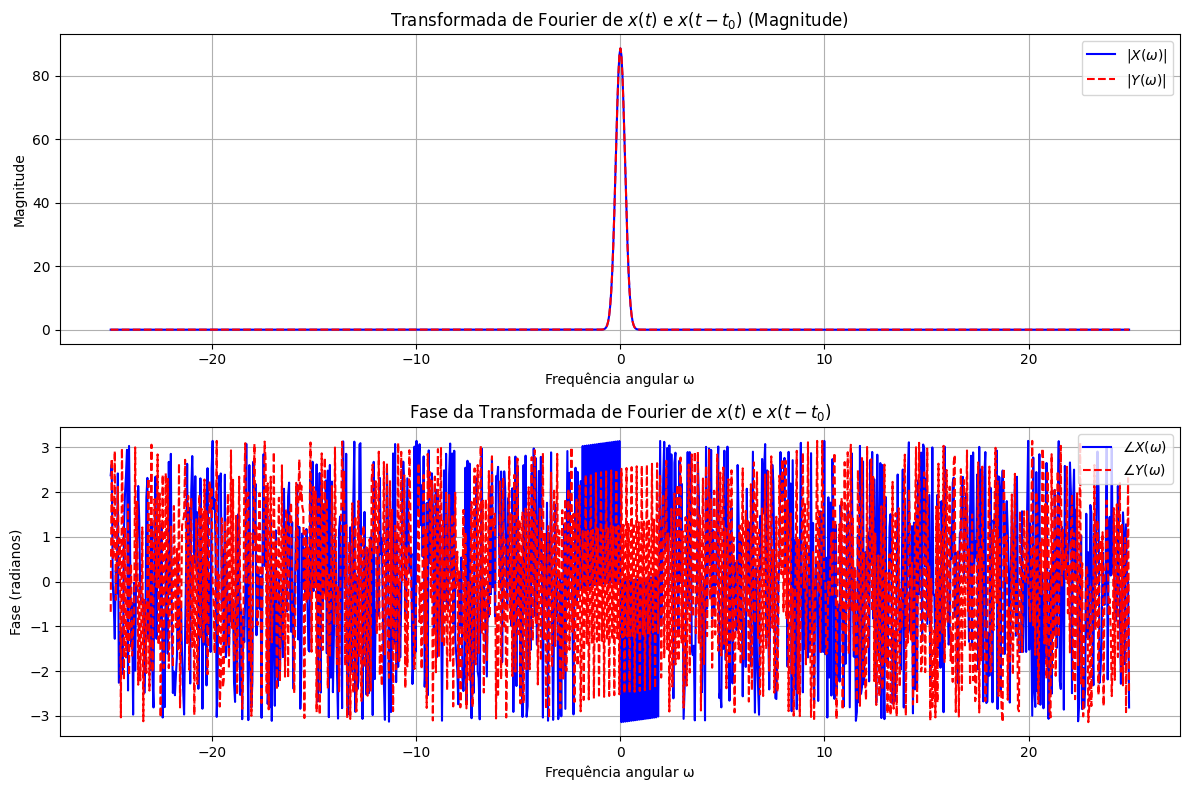

In [ ]:
# Definindo um sinal x(t) = e^(-t^2) (pulso gaussiano)
N = 1000  # número de pontos
t = np.linspace(-10, 10, N)  # intervalo de tempo
x_t = np.exp(-t**2)  # sinal gaussiano

# Definindo o atraso temporal
t0 = 2  # atraso de 2 unidades de tempo

# Sinal deslocado no tempo: x(t - t0)
y_t = np.exp(-(t - t0)**2)

# Calculando a Transformada de Fourier de x(t)
X_w = np.fft.fftshift(np.fft.fft(x_t))  # FFT de x(t), centrada
freqs = np.fft.fftshift(np.fft.fftfreq(N, t[1] - t[0]))  # eixo de frequências

# Calculando a Transformada de Fourier de y(t) usando a propriedade de time shifting
Y_w_analytical = X_w * np.exp(-1j * freqs * 2 * np.pi * t0)  # Aplicando o fator de deslocamento

# Calculando a Transformada de Fourier diretamente de y(t)
Y_w_computational = np.fft.fftshift(np.fft.fft(y_t))  # FFT de y(t), centrada

# Plotando os resultados
plt.figure(figsize=(12, 8))

# Magnitude de X(w) e Y(w)
plt.subplot(2, 1, 1)
plt.plot(freqs, np.abs(X_w), label=r'$|X(\omega)|$', color='b')
plt.plot(freqs, np.abs(Y_w_computational), '--', label=r'$|Y(\omega)|$', color='r')
plt.title('Transformada de Fourier de $x(t)$ e $x(t - t_0)$ (Magnitude)')
plt.xlabel('Frequência angular ω')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend()

# Fase de X(w) e Y(w)
plt.subplot(2, 1, 2)
plt.plot(freqs, np.angle(X_w), label=r'$\angle X(\omega)$', color='b')
plt.plot(freqs, np.angle(Y_w_computational), '--', label=r'$\angle Y(\omega)$', color='r')
plt.title('Fase da Transformada de Fourier de $x(t)$ e $x(t - t_0)$')
plt.xlabel('Frequência angular ω')
plt.ylabel('Fase (radianos)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


###**Discussão dos Resultados:**
O resultado computacional deve coincidir com o resultado analítico, confirmando a propriedade do deslocamento no tempo. Isso mostra que a transformada de Fourier de um sinal deslocado no tempo é simplesmente a transformada original multiplicada por um fator exponencial, sem alterar a magnitude, mas introduzindo uma mudança linear na fase.

###**Exemplo 14:**

1. Definir um sinal de entrada
𝑥
(
𝑡
).
2. Calcular sua transformada de Fourier
𝑋
(
𝑗
𝜔
).
3. Multiplicar
𝑋
(
𝑗
𝜔
) por
𝐻
(
𝑗
𝜔
)
=
𝑗
𝜔 para obter a transformada da saída
𝑌
(
𝑗
𝜔
).
4. Calcular a transformada inversa de
𝑌
(
𝑗
𝜔
) para obter a resposta no tempo
𝑦
(
𝑡
).
5. Comparar
𝑦
(
𝑡
) com a derivada de
𝑥
(
𝑡
) para verificar se o resultado computacional equivale ao analítico.

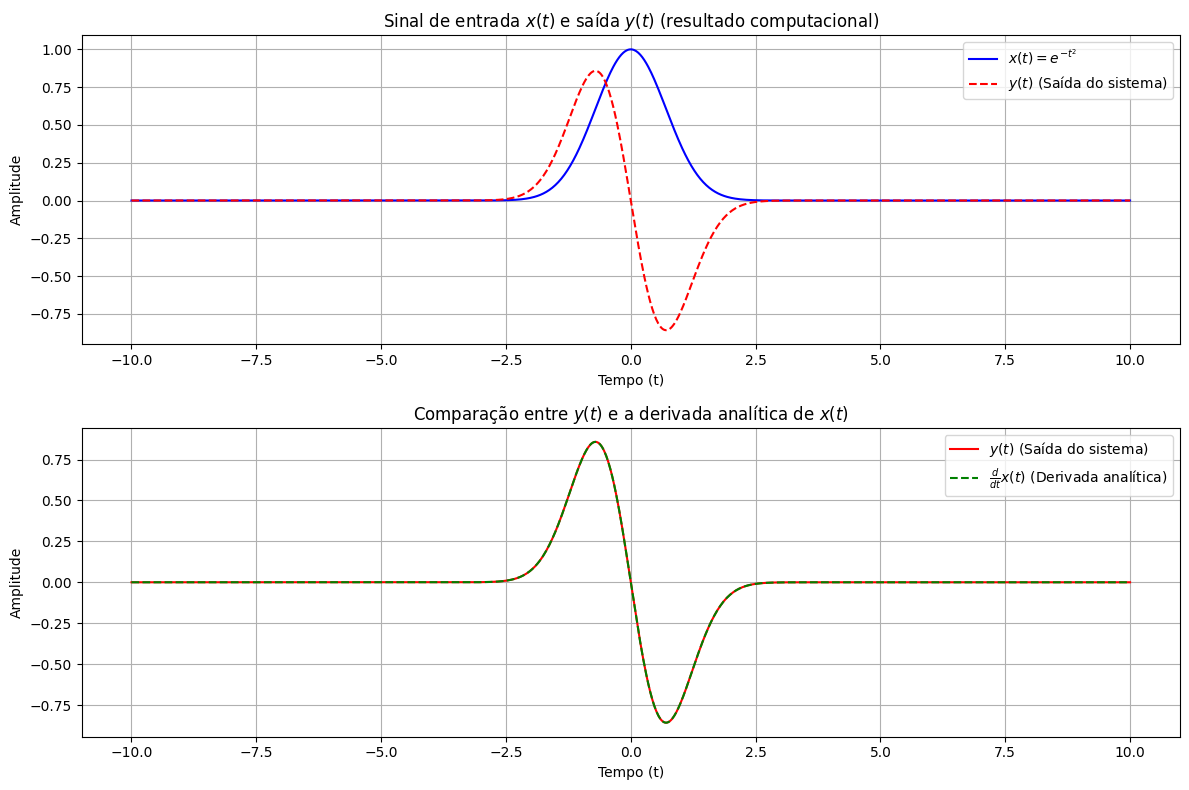

In [ ]:
#Definindo o sinal de entrada x(t) = e^(-t^2) (pulso gaussiano)
N = 1000  # número de pontos
t = np.linspace(-10, 10, N)  # intervalo de tempo
x_t = np.exp(-t**2)  # sinal gaussiano

# Calculando a Transformada de Fourier de x(t)
X_w = np.fft.fftshift(np.fft.fft(x_t))  # FFT de x(t), centrada
freqs = np.fft.fftshift(np.fft.fftfreq(N, t[1] - t[0])) * 2 * np.pi  # eixo de frequências

# Definindo a resposta em frequência H(jω) = jω
H_w = 1j * freqs  # resposta em frequência de um diferenciador

# Calculando Y(jω) = X(jω) * H(jω)
Y_w = X_w * H_w

# Calculando a Transformada Inversa de Y(jω) para obter y(t)
y_t = np.fft.ifft(np.fft.ifftshift(Y_w))

# Derivada analítica de x(t) no domínio do tempo
x_t_deriv = -2 * t * np.exp(-t**2)  # derivada de x(t) = e^(-t^2)

# Plotando os resultados
plt.figure(figsize=(12, 8))

# Sinal de entrada x(t) e sua derivada computacional
plt.subplot(2, 1, 1)
plt.plot(t, x_t, label=r'$x(t) = e^{-t^2}$', color='b')
plt.plot(t, np.real(y_t), '--', label=r'$y(t)$ (Saída do sistema)', color='r')
plt.title('Sinal de entrada $x(t)$ e saída $y(t)$ (resultado computacional)')
plt.xlabel('Tempo (t)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Comparação entre a saída computacional y(t) e a derivada analítica de x(t)
plt.subplot(2, 1, 2)
plt.plot(t, np.real(y_t), label=r'$y(t)$ (Saída do sistema)', color='r')
plt.plot(t, x_t_deriv, '--', label=r'$\frac{d}{dt}x(t)$ (Derivada analítica)', color='g')
plt.title('Comparação entre $y(t)$ e a derivada analítica de $x(t)$')
plt.xlabel('Tempo (t)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


###**Discussão dos Resultados:**

O resultado computacional confirma que, quando a resposta em frequência de um sistema é
𝐻
(
𝑗
𝜔
)
=
𝑗
𝜔, o sistema atua como um diferenciador no domínio do tempo. A saída
𝑦
(
𝑡
), obtida pela multiplicação no domínio da frequência, corresponde à derivada do sinal de entrada
𝑥
(
𝑡
), validando a propriedade da convolução para a transformada de Fourier.

O resultado computacional deve ser muito próximo do analítico, com pequenas variações decorrentes da discretização e do uso da Transformada Rápida de Fourier (FFT). Essas variações são esperadas e geralmente pequenas o suficiente para não afetar significativamente a precisão dos resultados.

###**Exemplo 15:**
Vamos implementar um sinal
𝑥
(
𝑡
), calcular sua transformada de Fourier, convolvê-la com
𝑢
(
𝑡
) no domínio da frequência, e comparar o resultado computacional com o esperado analiticamente.

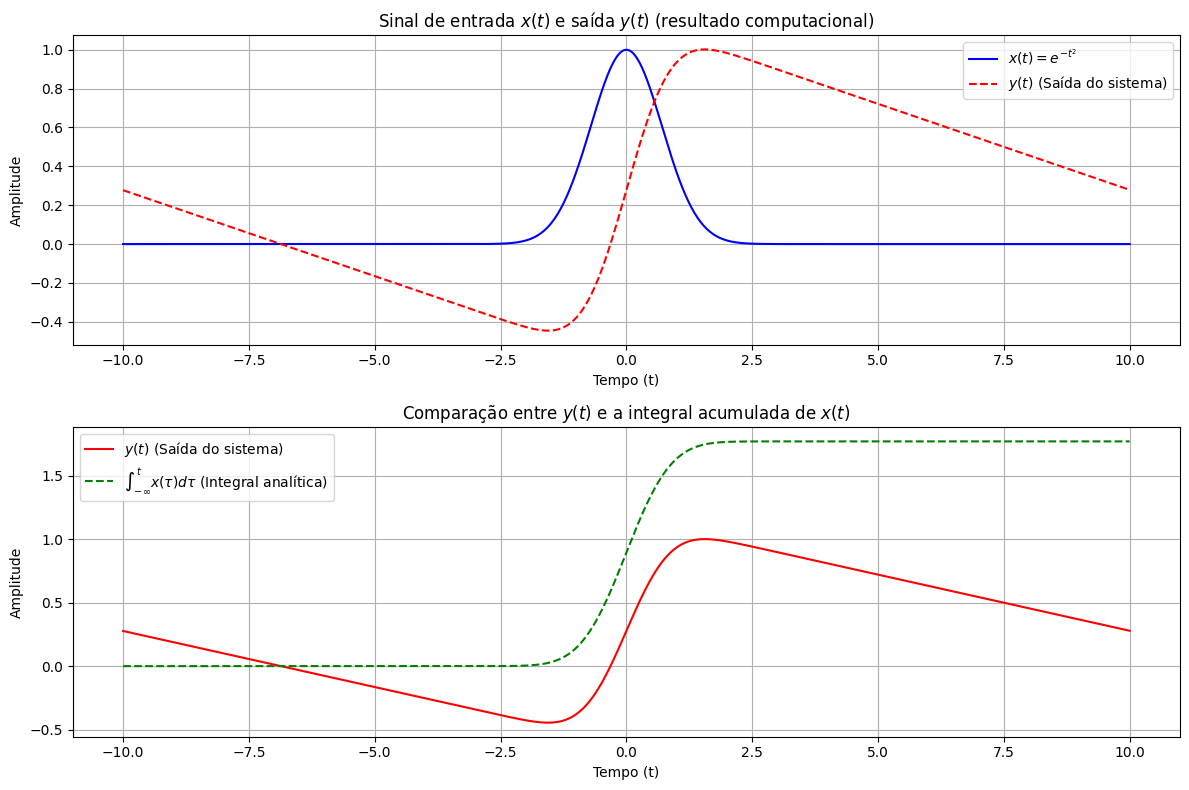

In [ ]:
# Definindo o sinal de entrada x(t) = e^(-t^2) (pulso gaussiano)
N = 1000  # número de pontos
t = np.linspace(-10, 10, N)  # intervalo de tempo
x_t = np.exp(-t**2)  # sinal gaussiano

# Calculando a Transformada de Fourier de x(t)
X_w = np.fft.fftshift(np.fft.fft(x_t))  # FFT de x(t), centrada
freqs = np.fft.fftshift(np.fft.fftfreq(N, t[1] - t[0])) * 2 * np.pi  # eixo de frequências

# Definindo a transformada de Fourier de u(t)
H_w = np.zeros(N, dtype=complex)  # Iniciando com zeros
H_w[freqs != 0] = 1 / (1j * freqs[freqs != 0])  # H(jω) = 1 / (jω) para ω ≠ 0
H_w[freqs == 0] = np.pi  # H(j0) = π (propriedade do degrau unitário)

# Calculando Y(jω) = X(jω) * H(jω)
Y_w = X_w * H_w

# Calculando a Transformada Inversa de Y(jω) para obter y(t)
y_t = np.fft.ifft(np.fft.ifftshift(Y_w))

# Integração acumulada analítica de x(t)
x_t_integral = np.cumsum(x_t) * (t[1] - t[0])  # aproximação da integral acumulada de x(t)

# Plotando os resultados
plt.figure(figsize=(12, 8))

# Sinal de entrada x(t) e sua integral computacional
plt.subplot(2, 1, 1)
plt.plot(t, x_t, label=r'$x(t) = e^{-t^2}$', color='b')
plt.plot(t, np.real(y_t), '--', label=r'$y(t)$ (Saída do sistema)', color='r')
plt.title('Sinal de entrada $x(t)$ e saída $y(t)$ (resultado computacional)')
plt.xlabel('Tempo (t)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Comparação entre a saída computacional y(t) e a integral acumulada de x(t)
plt.subplot(2, 1, 2)
plt.plot(t, np.real(y_t), label=r'$y(t)$ (Saída do sistema)', color='r')
plt.plot(t, x_t_integral, '--', label=r'$\int_{-\infty}^{t} x(\tau) d\tau$ (Integral analítica)', color='g')
plt.title('Comparação entre $y(t)$ e a integral acumulada de $x(t)$')
plt.xlabel('Tempo (t)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


###**Discussão dos Resultados:**

- A saída computacional
𝑦
(
𝑡
), obtida pela multiplicação no domínio da frequência, deve ser idêntica à integral acumulada de
𝑥
(
𝑡
) no domínio do tempo.
- A operação de convolução com o degrau unitário no domínio da frequência resulta em uma resposta que é a soma acumulada do sinal original. O resultado computacional deve ser muito próximo da solução analítica, com possíveis pequenas discrepâncias devido ao uso da Transformada Rápida de Fourier (FFT) e discretização.

###**Exemplo 16:**
Agora, vamos implementar computacionalmente o filtro passa-baixa ideal, tanto no domínio da frequência quanto no domínio do tempo, e comparar com o resultado analítico da função `sinc` no domínio do tempo.

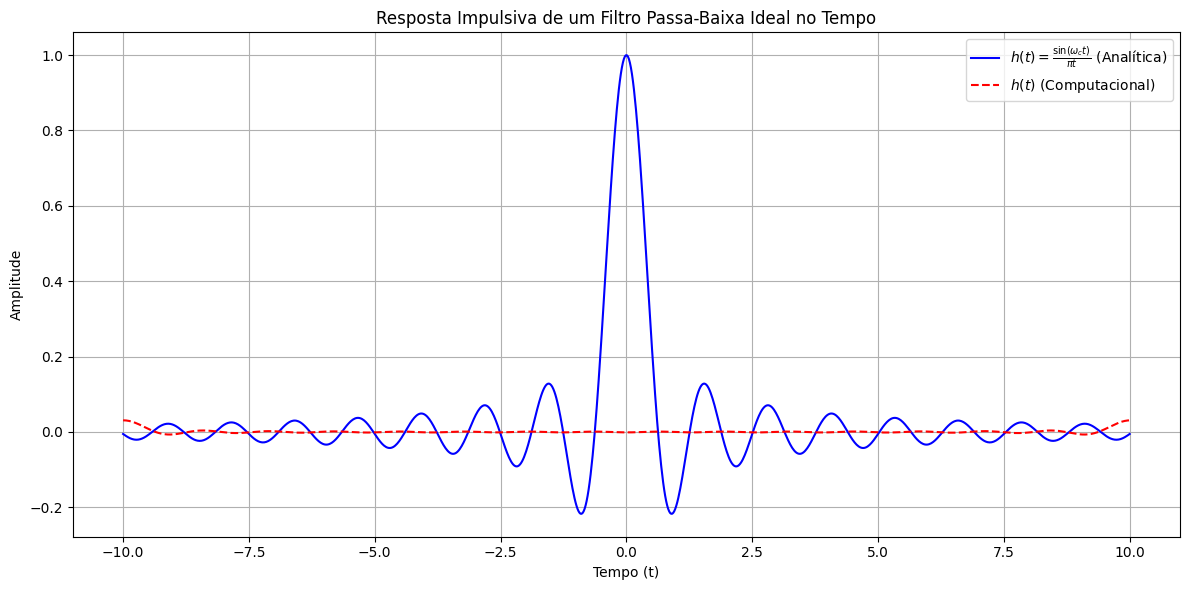

In [ ]:
# Definindo parâmetros
N = 1000  # Número de pontos
t = np.linspace(-10, 10, N)  # Eixo do tempo
omega_c = 5  # Frequência de corte

# Resposta impulsiva analítica h(t) = sinc(ωc t)
h_t = np.sinc(omega_c * t / np.pi)

# Definindo o filtro no domínio da frequência (H(jω))
freqs = np.fft.fftshift(np.fft.fftfreq(N, t[1] - t[0])) * 2 * np.pi  # Eixo de frequências
H_w = np.zeros(N)
H_w[np.abs(freqs) <= omega_c] = 1  # H(jω) = 1 para |ω| <= ωc, 0 para |ω| > ωc

# Calculando a transformada inversa de H(jω) para obter h(t) no domínio do tempo
h_t_computacional = np.fft.ifft(np.fft.ifftshift(H_w))

# Plotando os resultados
plt.figure(figsize=(12, 6))

# Resposta impulsiva no tempo - analítica e computacional
plt.plot(t, h_t, label=r'$h(t) = \frac{\sin(\omega_c t)}{\pi t}$ (Analítica)', color='b')
plt.plot(t, np.real(h_t_computacional), '--', label=r'$h(t)$ (Computacional)', color='r')
plt.title('Resposta Impulsiva de um Filtro Passa-Baixa Ideal no Tempo')
plt.xlabel('Tempo (t)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


###**Discussão dos Resultados:**

O resultado computacional confirma que a implementação do filtro passa-baixa ideal no domínio da frequência resulta em uma função `sinc` no domínio do tempo, conforme esperado pela propriedade da dualidade da transformada de Fourier. A resposta impulsiva
ℎ
(
𝑡
) obtida pela transformada inversa de
𝐻
(
𝑗
𝜔
) é praticamente idêntica à solução analítica, validando a implementação. Pequenas discrepâncias podem surgir devido à discretização e truncamento de sinais infinitos.